# Churn Prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E Commerce Dataset.csv')

In [3]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [7]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

# Preprocessing

In [8]:
# Create a function to map the satisfaction scores to categories
def map_satisfaction_category(score):
    if score == 1:
        return 'Very Dissatisfied'
    elif score == 2:
        return 'Dissatisfied'
    elif score == 3:
        return 'Neutral'
    elif score == 4:
        return 'Satisfied'
    else:
        return 'Very Satisfied'

# Apply the mapping function to create the Satisfaction Category column
df['SatisfactionScore'] = df['SatisfactionScore'].apply(map_satisfaction_category)

def churntype(Churn):
    if Churn == 1:
        return 'Yes'
    else:
        return 'No'

df['Churn'] = df['Churn'].apply(churntype)

def tiertype(CityTier):
    if CityTier == 1:
        return 'Tier 1'
    elif CityTier == 2:
        return 'Tier 2'
    else:
        return 'Tier 3'

df['CityTier'] = df['CityTier'].apply(tiertype)

def complaintype(Complain):
    if Complain == 1:
        return 'Yes'
    else:
        return 'No'

df['Complain'] = df['Complain'].apply(churntype)

df['CustomerID'] = df['CustomerID'].astype(object)

In [9]:
df.describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.221492
std,8.557241,8.531475,0.721926,1.023999,2.583586,3.675485,1.894621,2.939680,3.654433,49.193869
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,16.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,325.000000


### Handling Missing Values

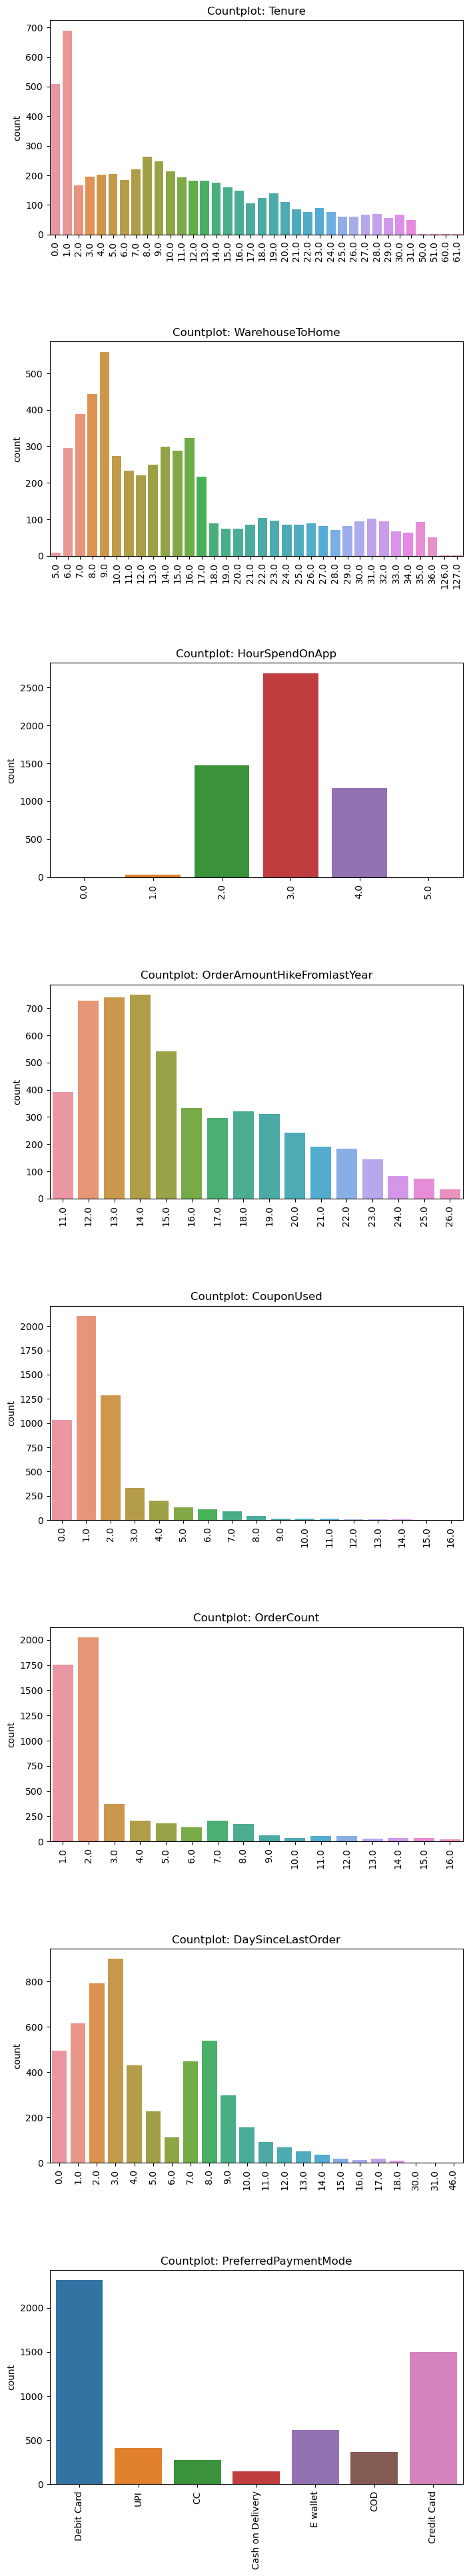

In [12]:
missing_columns = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear",
                   "CouponUsed", "OrderCount", "DaySinceLastOrder","PreferredPaymentMode"]

# Set up the figure and axes for countplots
fig, axes = plt.subplots(len(missing_columns), 1, figsize=(8, 6 * len(missing_columns)))
fig.subplots_adjust(hspace=0.5)

# Create countplots for each column
for i, column in enumerate(missing_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f"Countplot: {column}")
    axes[i].set_xlabel("")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Tilt x-axis labels
# Display the countplots
plt.show()

In [13]:
# Merge payment mode categories
df["PreferredPaymentMode"] = df["PreferredPaymentMode"].replace({"CC": "Card",
                                                                 "Debit Card": "Card",
                                                                 "Credit Card": "Card",
                                                                 "UPI": "Digital",
                                                                 "E wallet": "Digital",
                                                                 "COD": "Cash on Delivery",
                                                                 "Cash on Delivery": "Cash on Delivery"})

# Check the updated categories
print(df["PreferredPaymentMode"].value_counts())

PreferredPaymentMode
Card                4088
Digital             1028
Cash on Delivery     514
Name: count, dtype: int64


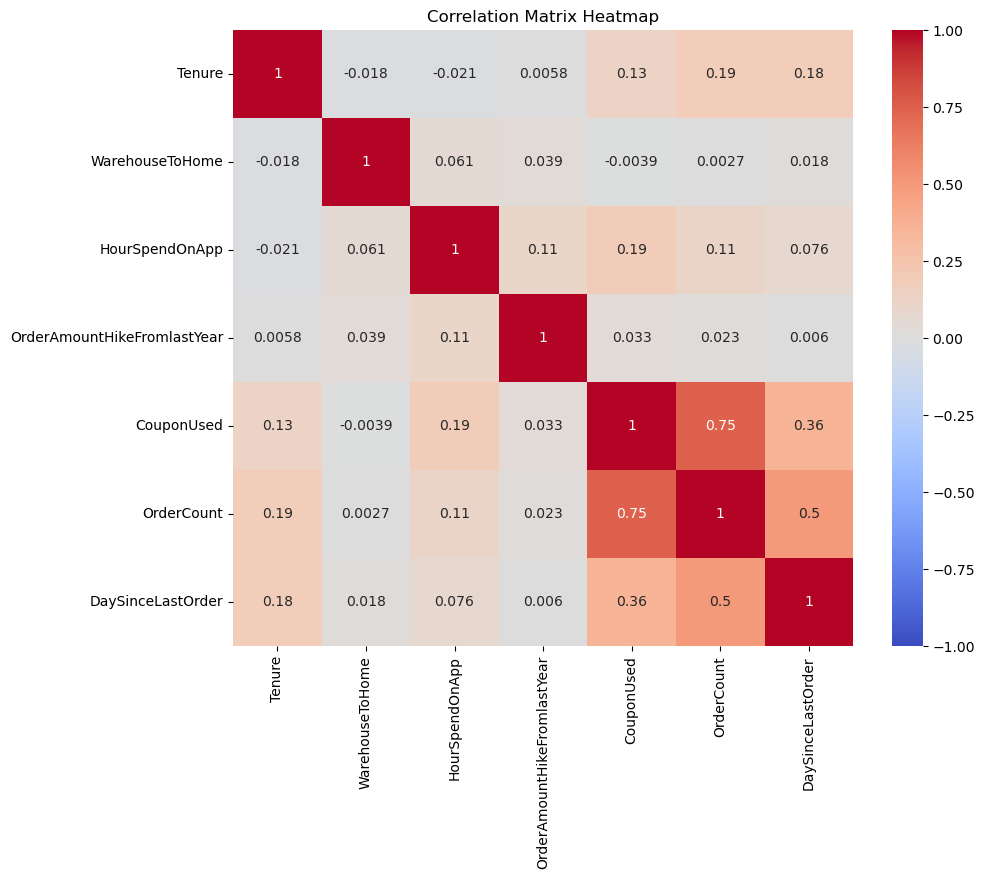

In [14]:
# Select the numerical columns
numerical_columns = ["Tenure", "WarehouseToHome", "HourSpendOnApp", "OrderAmountHikeFromlastYear",
                     "CouponUsed", "OrderCount", "DaySinceLastOrder"]

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
df[numerical_columns].corr()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
Tenure,1.000000,-0.018218,-0.021226,0.005825,0.129035,0.186403,0.184552
WarehouseToHome,-0.018218,1.000000,0.060990,0.038795,-0.003935,0.002681,0.017829
HourSpendOnApp,-0.021226,0.060990,1.000000,0.106843,0.191528,0.109575,0.075716
OrderAmountHikeFromlastYear,0.005825,0.038795,0.106843,1.000000,0.033201,0.023101,0.006003
CouponUsed,0.129035,-0.003935,0.191528,0.033201,1.000000,0.745245,0.358930
OrderCount,0.186403,0.002681,0.109575,0.023101,0.745245,1.000000,0.497928
DaySinceLastOrder,0.184552,0.017829,0.075716,0.006003,0.358930,0.497928,1.000000


In [16]:
# Impute missing values with the mean
for column in numerical_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

In [17]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [18]:
int_columns = ["OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount"]

for column in int_columns:
    # Convert column to integer data type
    df[column] = df[column].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   object 
 1   Churn                        5630 non-null   object 
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Handling Outliers

In [20]:
float_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'DaySinceLastOrder', 'CashbackAmount']

for column in float_columns:
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine lower and upper thresholds for outliers
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Replace outliers with lower or upper threshold value
    df[column] = np.where(df[column] < lower_threshold, lower_threshold, df[column])
    df[column] = np.where(df[column] > upper_threshold, upper_threshold, df[column])

In [21]:
int_columns = ['NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount']
for column in int_columns:
    # Calculate IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine lower and upper thresholds for outliers
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Replace outliers with lower or upper threshold value
    df[column] = np.where(df[column] < lower_threshold, lower_threshold, df[column])
    df[column] = np.where(df[column] > upper_threshold, upper_threshold, df[column])
    df[column] = df[column].astype(int)  # Convert column back to integer data type


# Exploratory Data Analysis

<AxesSubplot:xlabel='Churn', ylabel='HourSpendOnApp'>

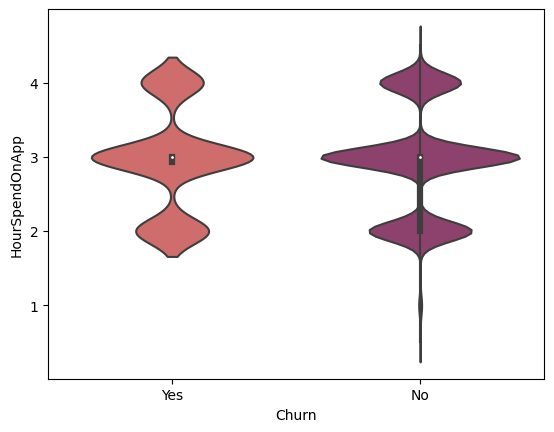

In [22]:
sns.violinplot(data=df, x='Churn',y='HourSpendOnApp', palette="flare")

<AxesSubplot:xlabel='CityTier', ylabel='HourSpendOnApp'>

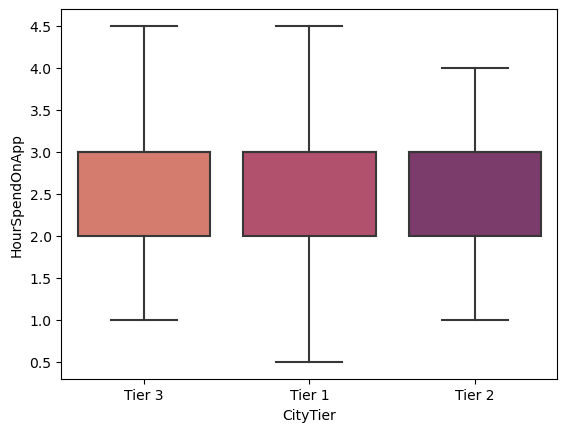

In [23]:
sns.boxplot(data=df, x='CityTier',y='HourSpendOnApp', palette="flare")

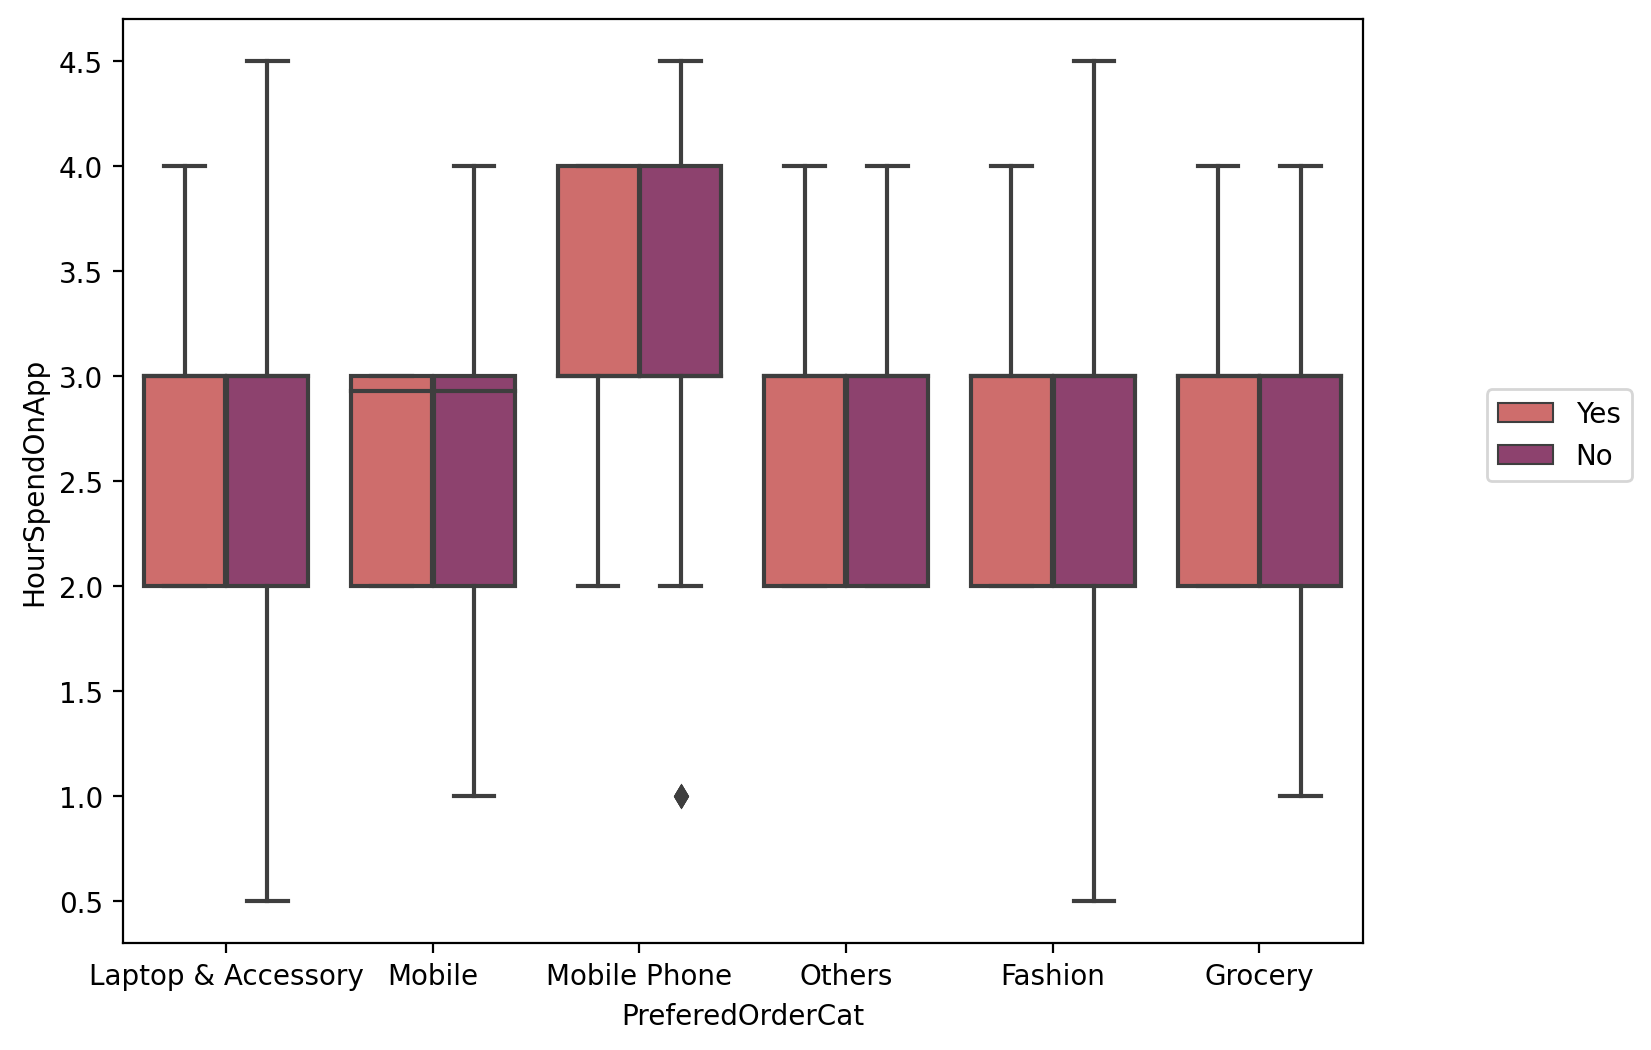

In [24]:
plt.figure(figsize=(8,6), dpi=200)

sns.boxplot(data=df, x='PreferedOrderCat',y='HourSpendOnApp', hue='Churn', palette="flare")
plt.legend(loc=(1.1,0.5))

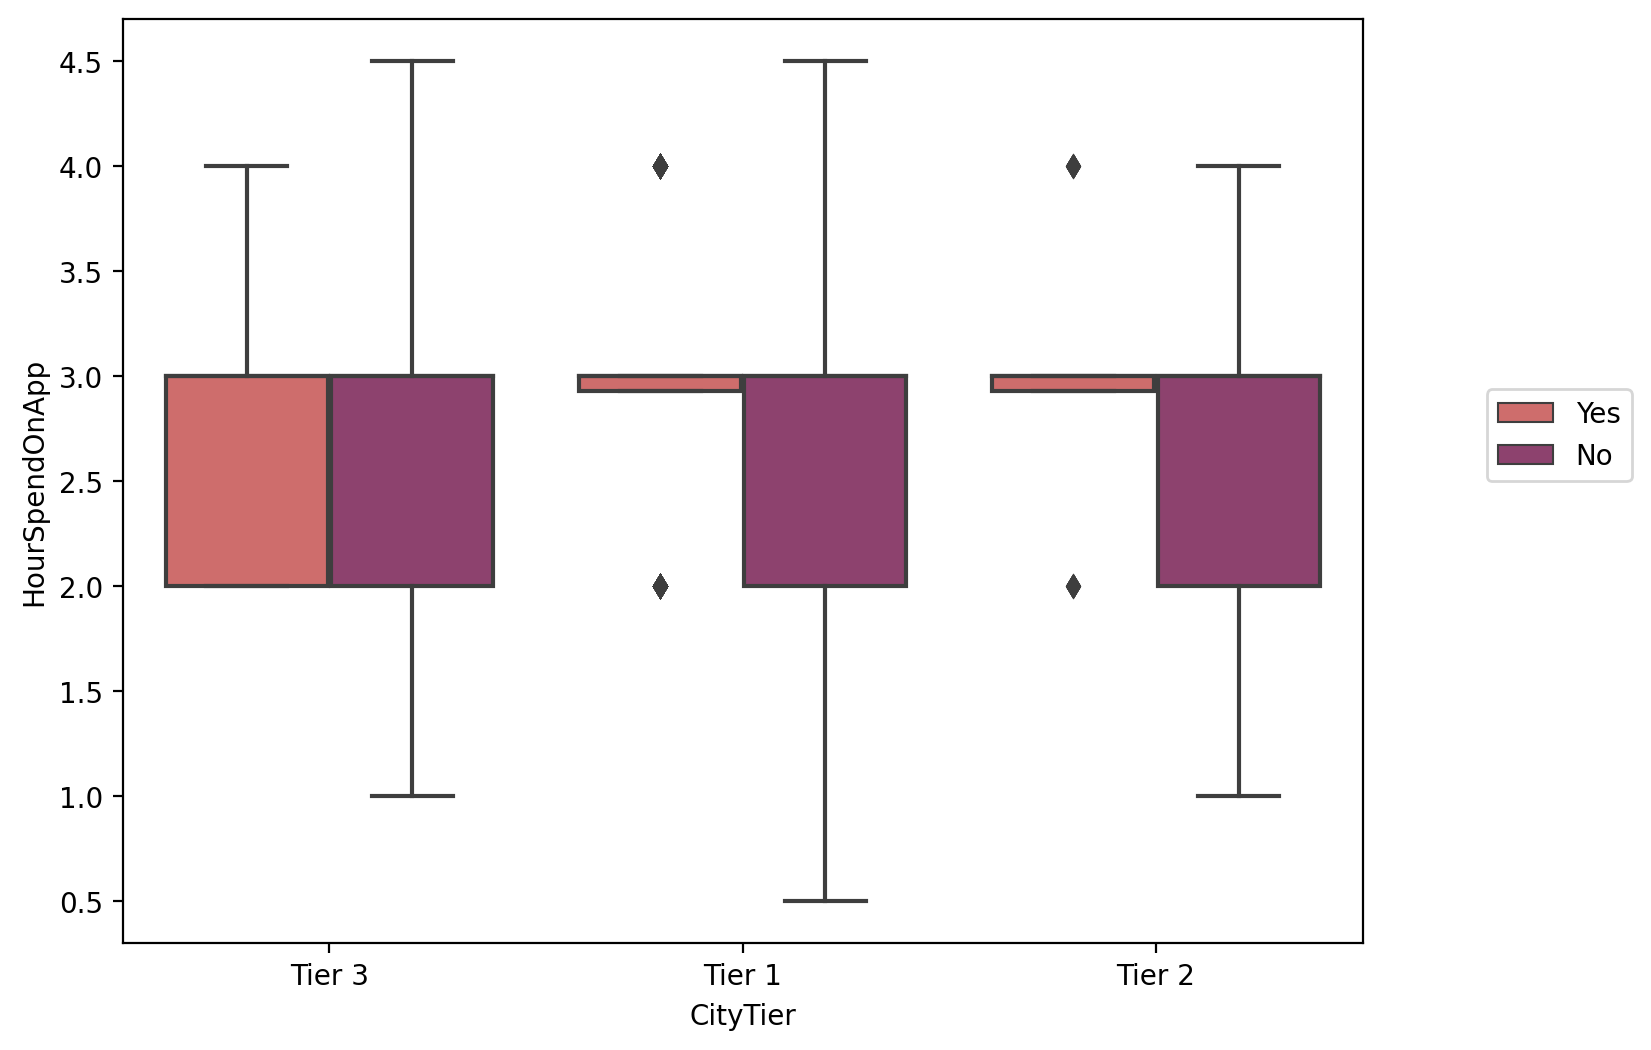

In [25]:
plt.figure(figsize=(8,6), dpi=200)

sns.boxplot(data=df, x='CityTier',y='HourSpendOnApp', hue='Churn', palette="flare")
plt.legend(loc=(1.1,0.5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x1600 with 0 Axes>

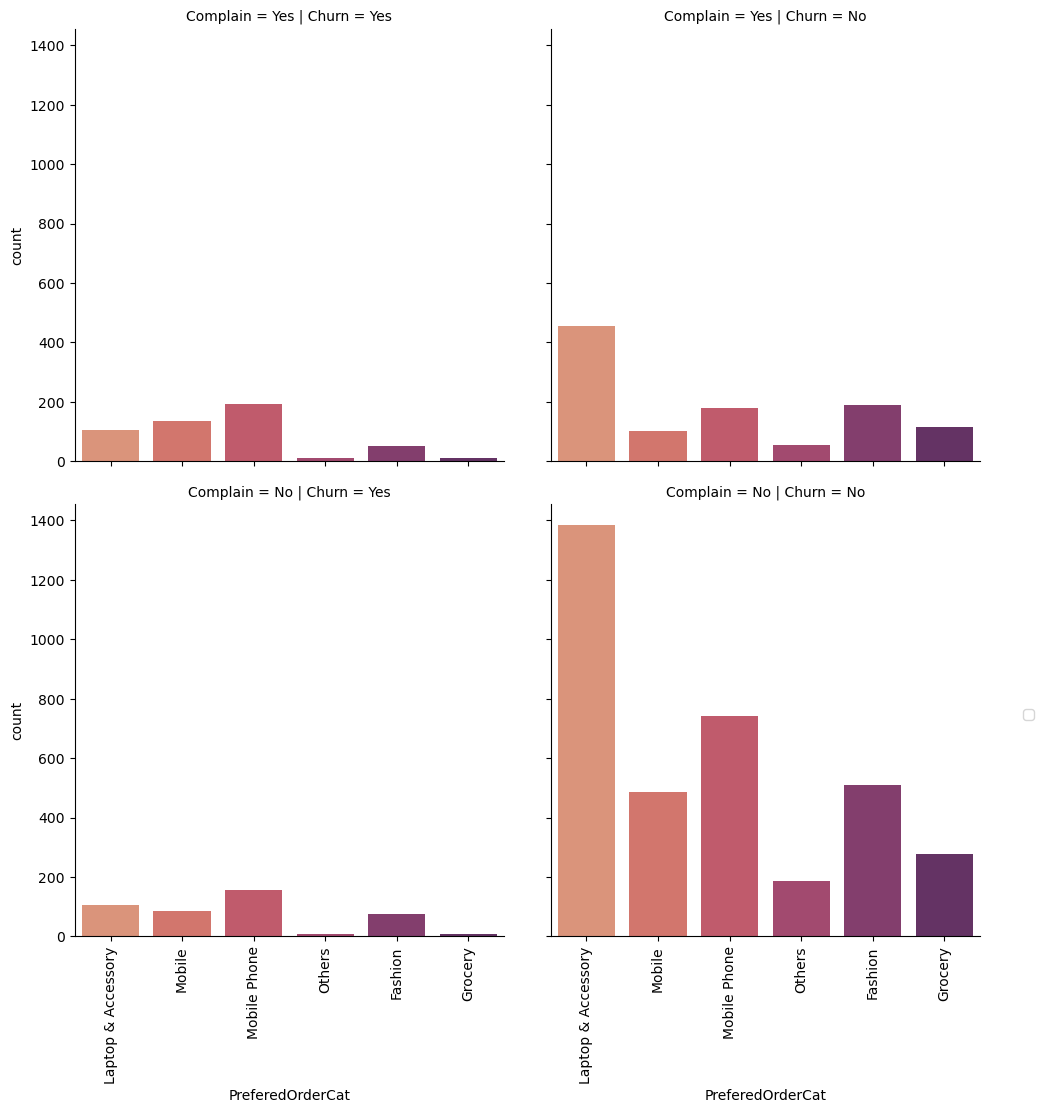

In [26]:
plt.figure(figsize=(10,8), dpi=200)
g = sns.catplot(
    data=df, x="PreferedOrderCat", row="Complain", col="Churn", kind="count", palette="flare")
g.set_xticklabels(rotation=90)  # Rotate xticks labels on all graphs

plt.legend(loc=(1.1, 0.5))
plt.show();

<Figure size 4000x1600 with 0 Axes>

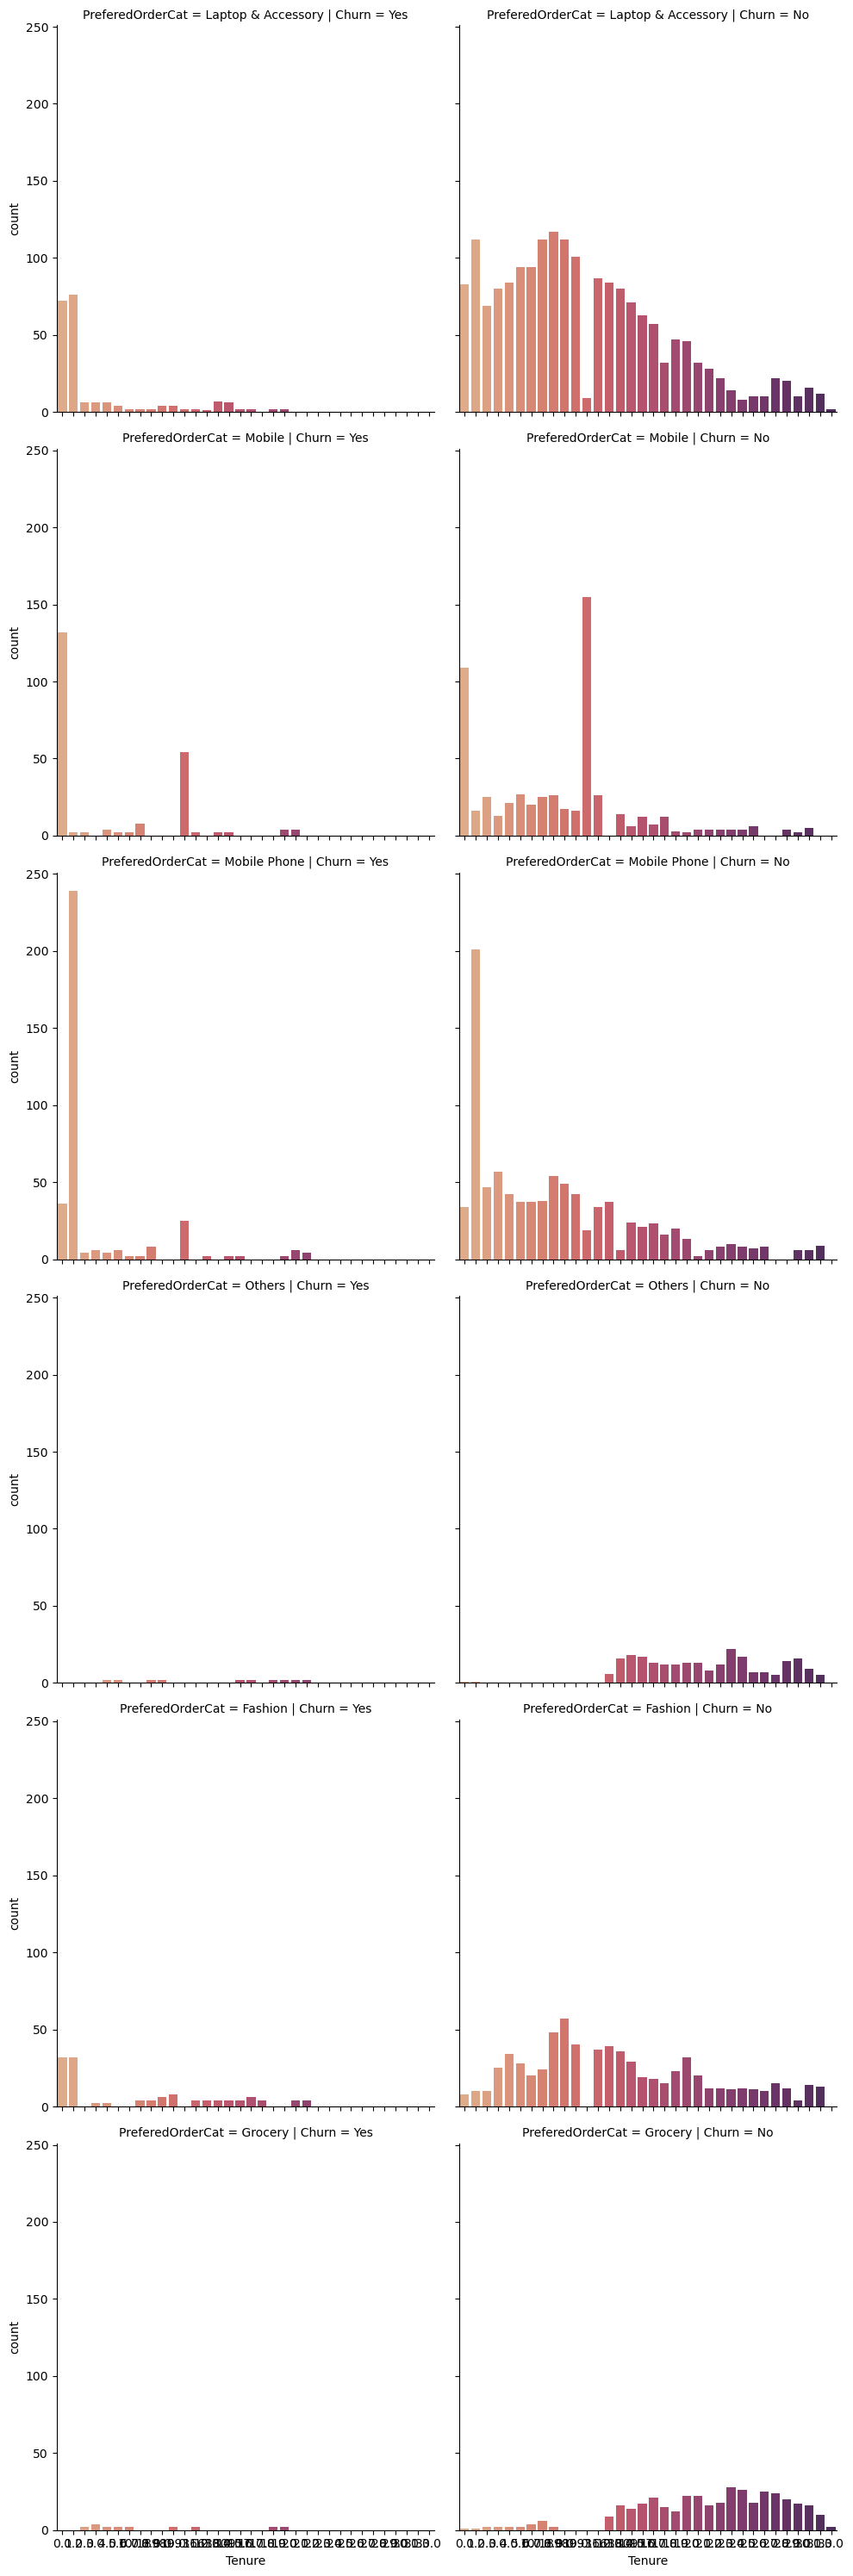

In [29]:
plt.figure(figsize=(20,8), dpi=200)

sns.catplot(data=df, x="Tenure", row="PreferedOrderCat", col="Churn", kind="count", palette="flare")

<AxesSubplot:xlabel='Tenure', ylabel='CashbackAmount'>

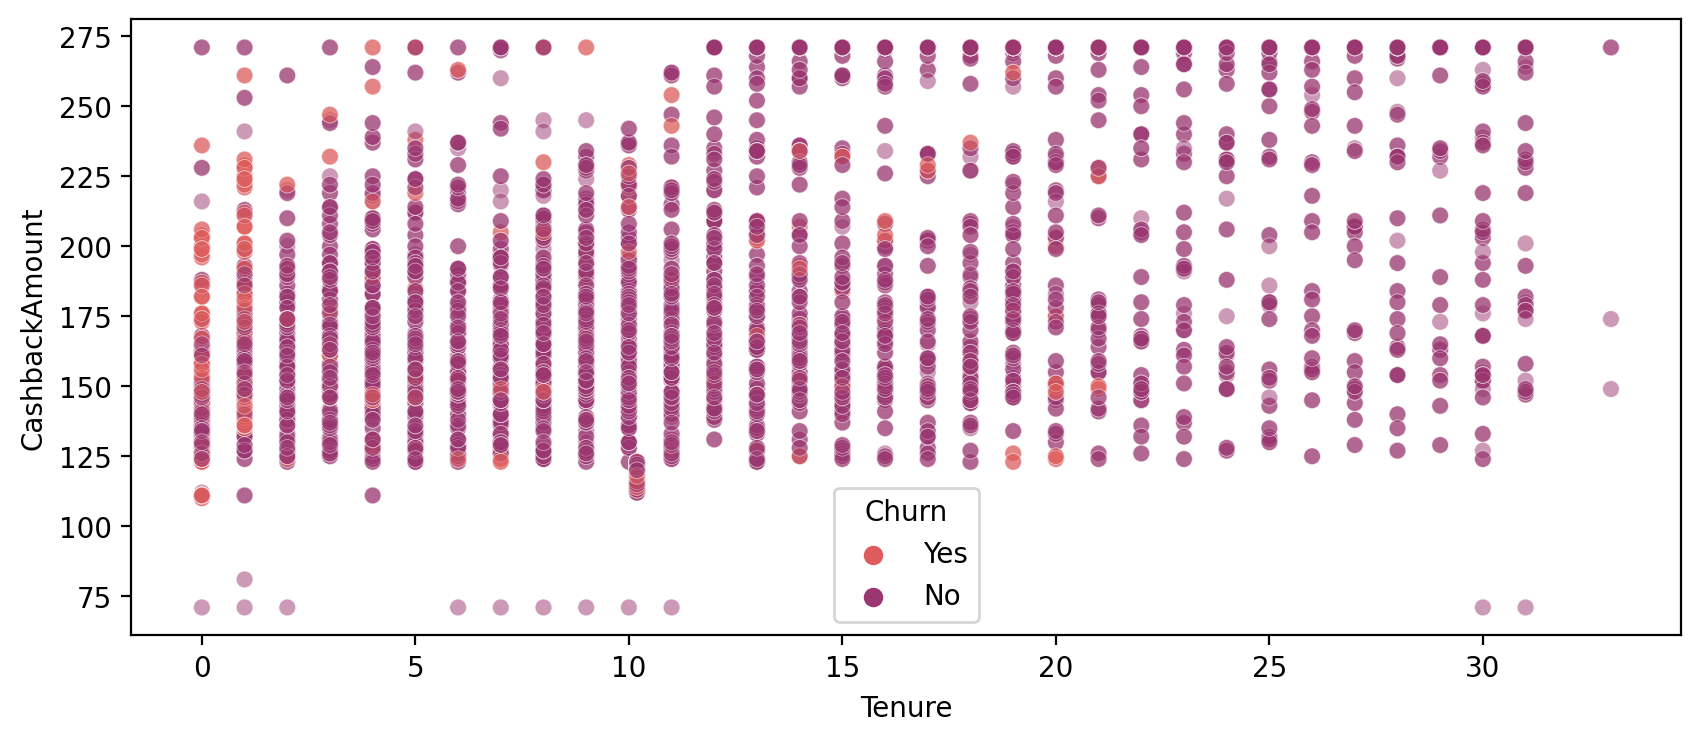

In [30]:
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(data=df, x="Tenure", y="CashbackAmount",  hue="Churn", alpha=.5,linewidth=.3, palette="flare")

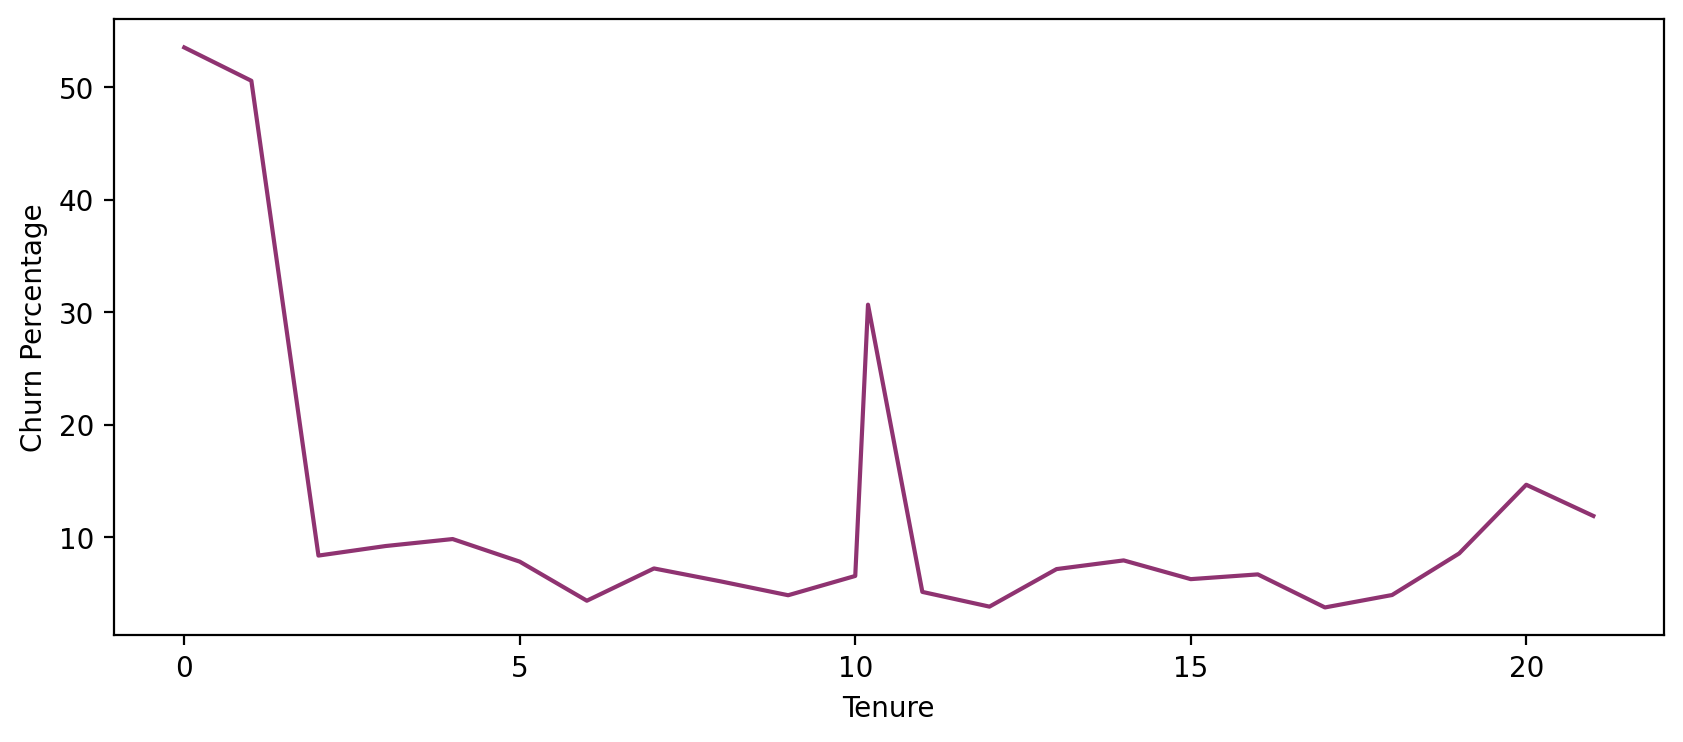

In [31]:
no_churn = df.groupby(['Churn','Tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','Tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)
a = churn_rate.transpose()['CustomerID']
plt.figure(figsize=(10,4),dpi=200)
churn_rate.transpose()['CustomerID'].plot(color=sns.color_palette("flare")[4])
plt.ylabel('Churn Percentage');

<AxesSubplot:xlabel='CashbackAmount', ylabel='DaySinceLastOrder'>

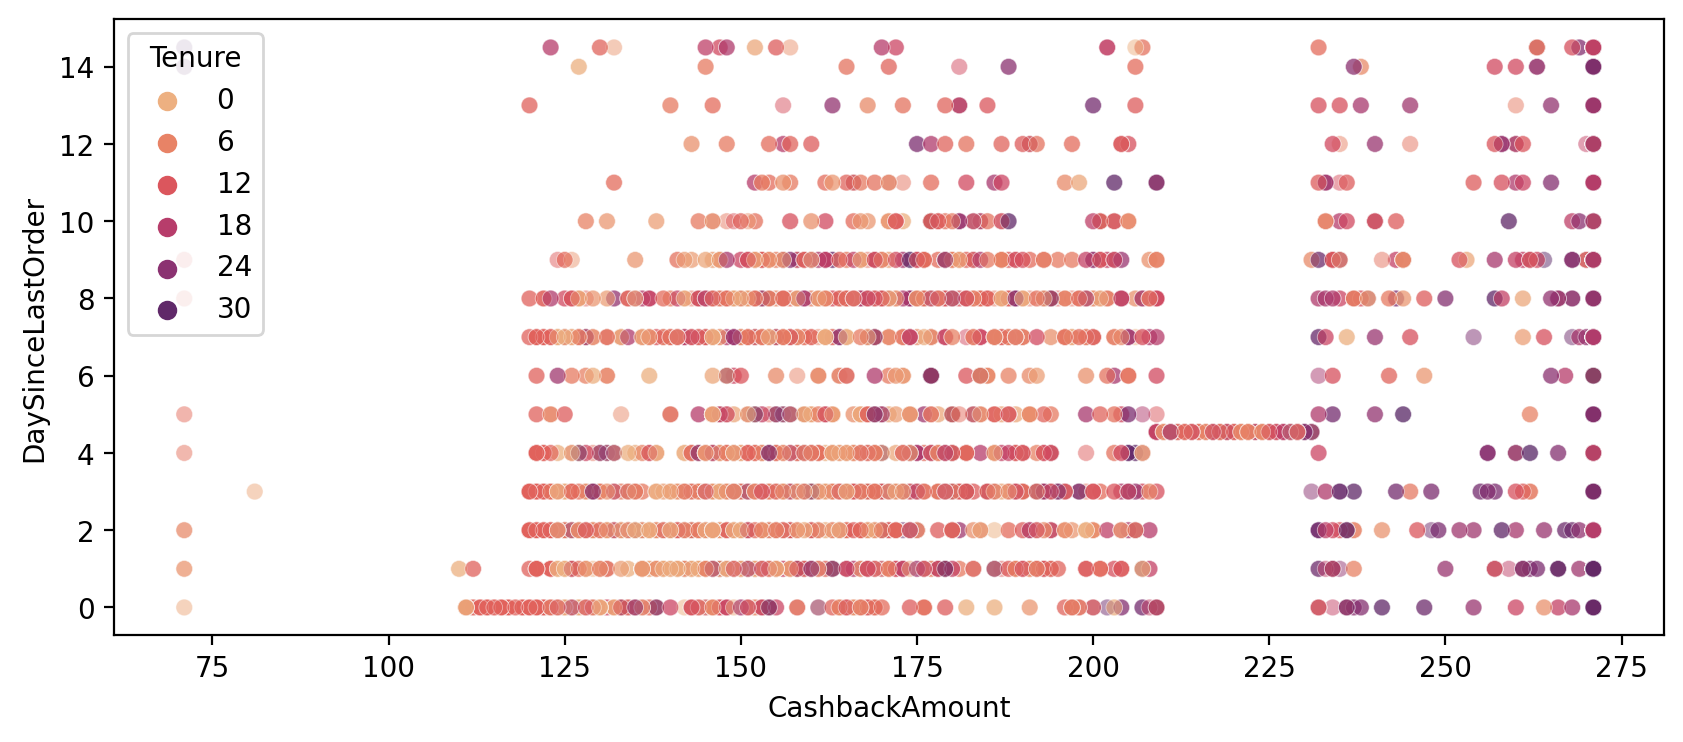

In [32]:
plt.figure(figsize=(10,4), dpi=200)

sns.scatterplot(data=df, x="CashbackAmount", y="DaySinceLastOrder",  hue="Tenure", alpha=.5,linewidth=.3, palette='flare')

In [34]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [35]:
X = df[['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]

# Developing Models

### Train|Test Split 

In [36]:
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression 

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

# Define the parameter grid
penalty=['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty':penalty, 'l1_ratio':l1_ratio,'C':C, 'solver': ['liblinear', 'saga']}

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8838838327783944


In [56]:
logistic_regression = LogisticRegression(C=1.0, l1_ratio=0.0, penalty='l1', solver='saga')
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Generate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95       941
         Yes       0.84      0.58      0.69       185

    accuracy                           0.91      1126
   macro avg       0.88      0.78      0.82      1126
weighted avg       0.91      0.91      0.91      1126



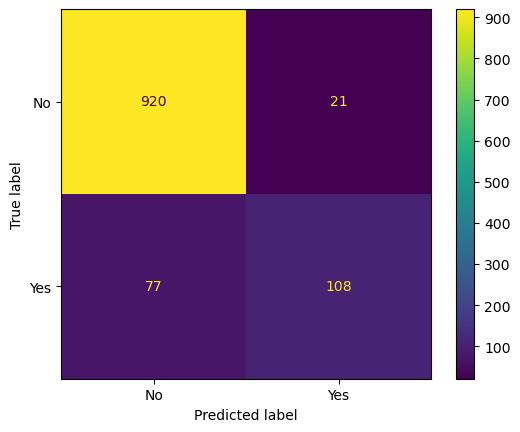

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic_regression, X_test_scaled, y_test)

In [60]:
class_counts = df['Churn'].value_counts()
total_customers = len(df)

percentages = class_counts / total_customers * 100
print(percentages)

No     83.161634
Yes    16.838366
Name: Churn, dtype: float64


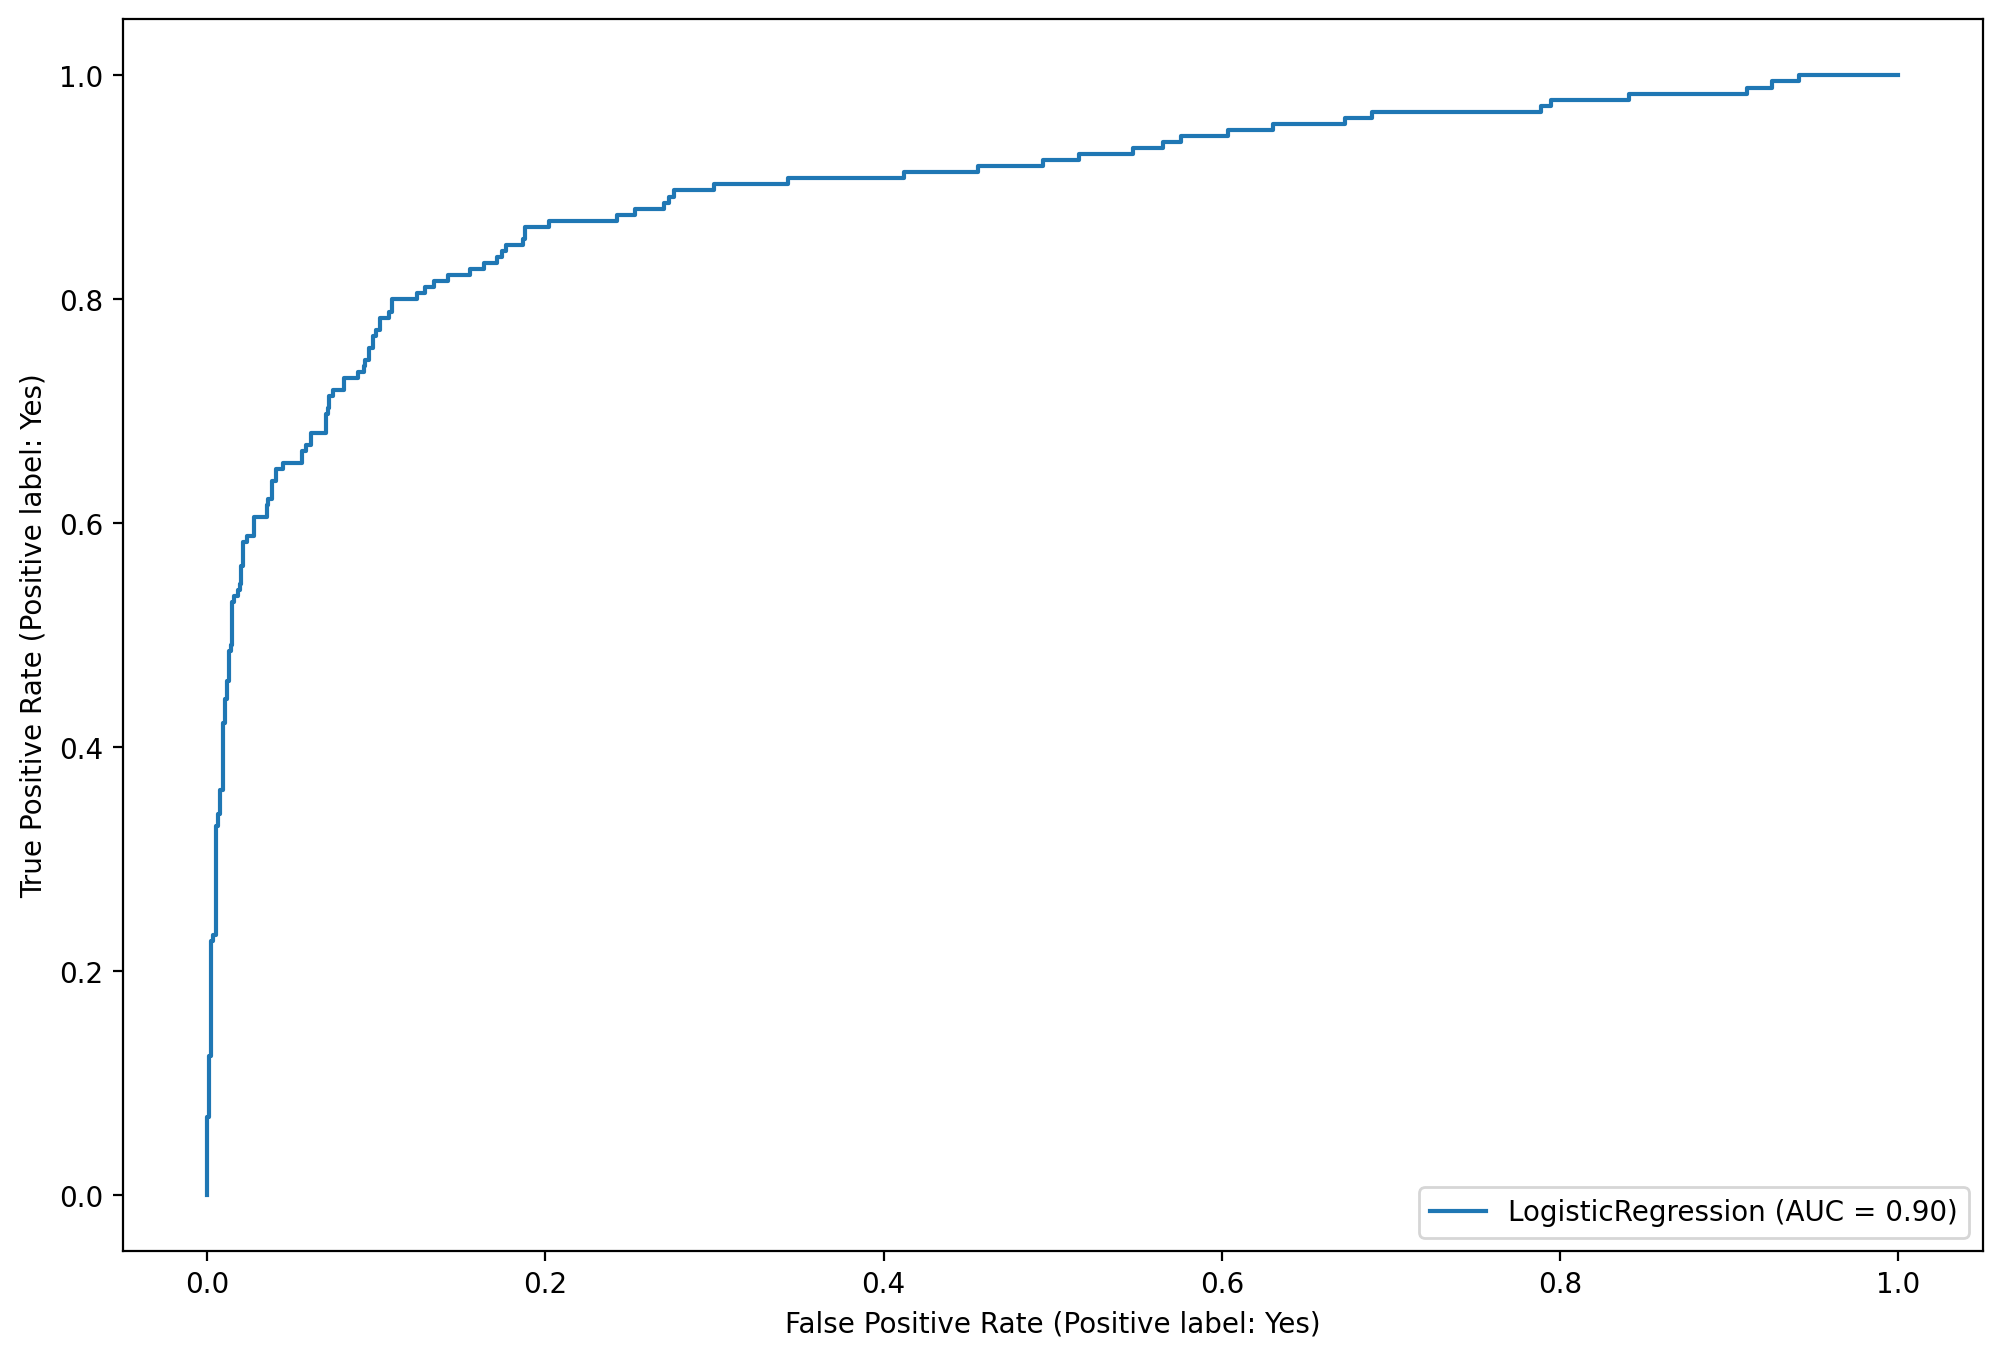

In [62]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
fig, ax= plt.subplots(figsize=(12,8),dpi=200)
plot_roc_curve(logistic_regression,X_test_scaled,y_test,ax=ax)

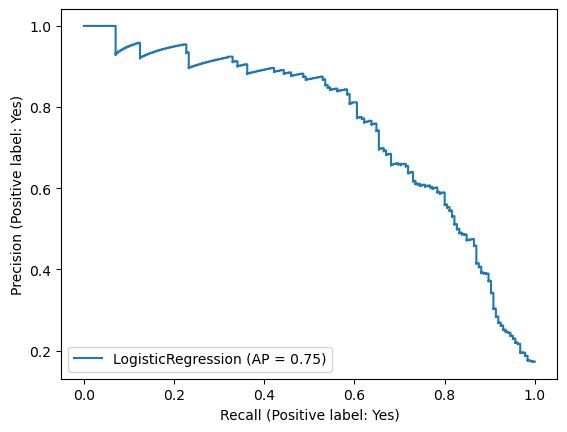

In [63]:
plot_precision_recall_curve(logistic_regression,X_test_scaled,y_test)

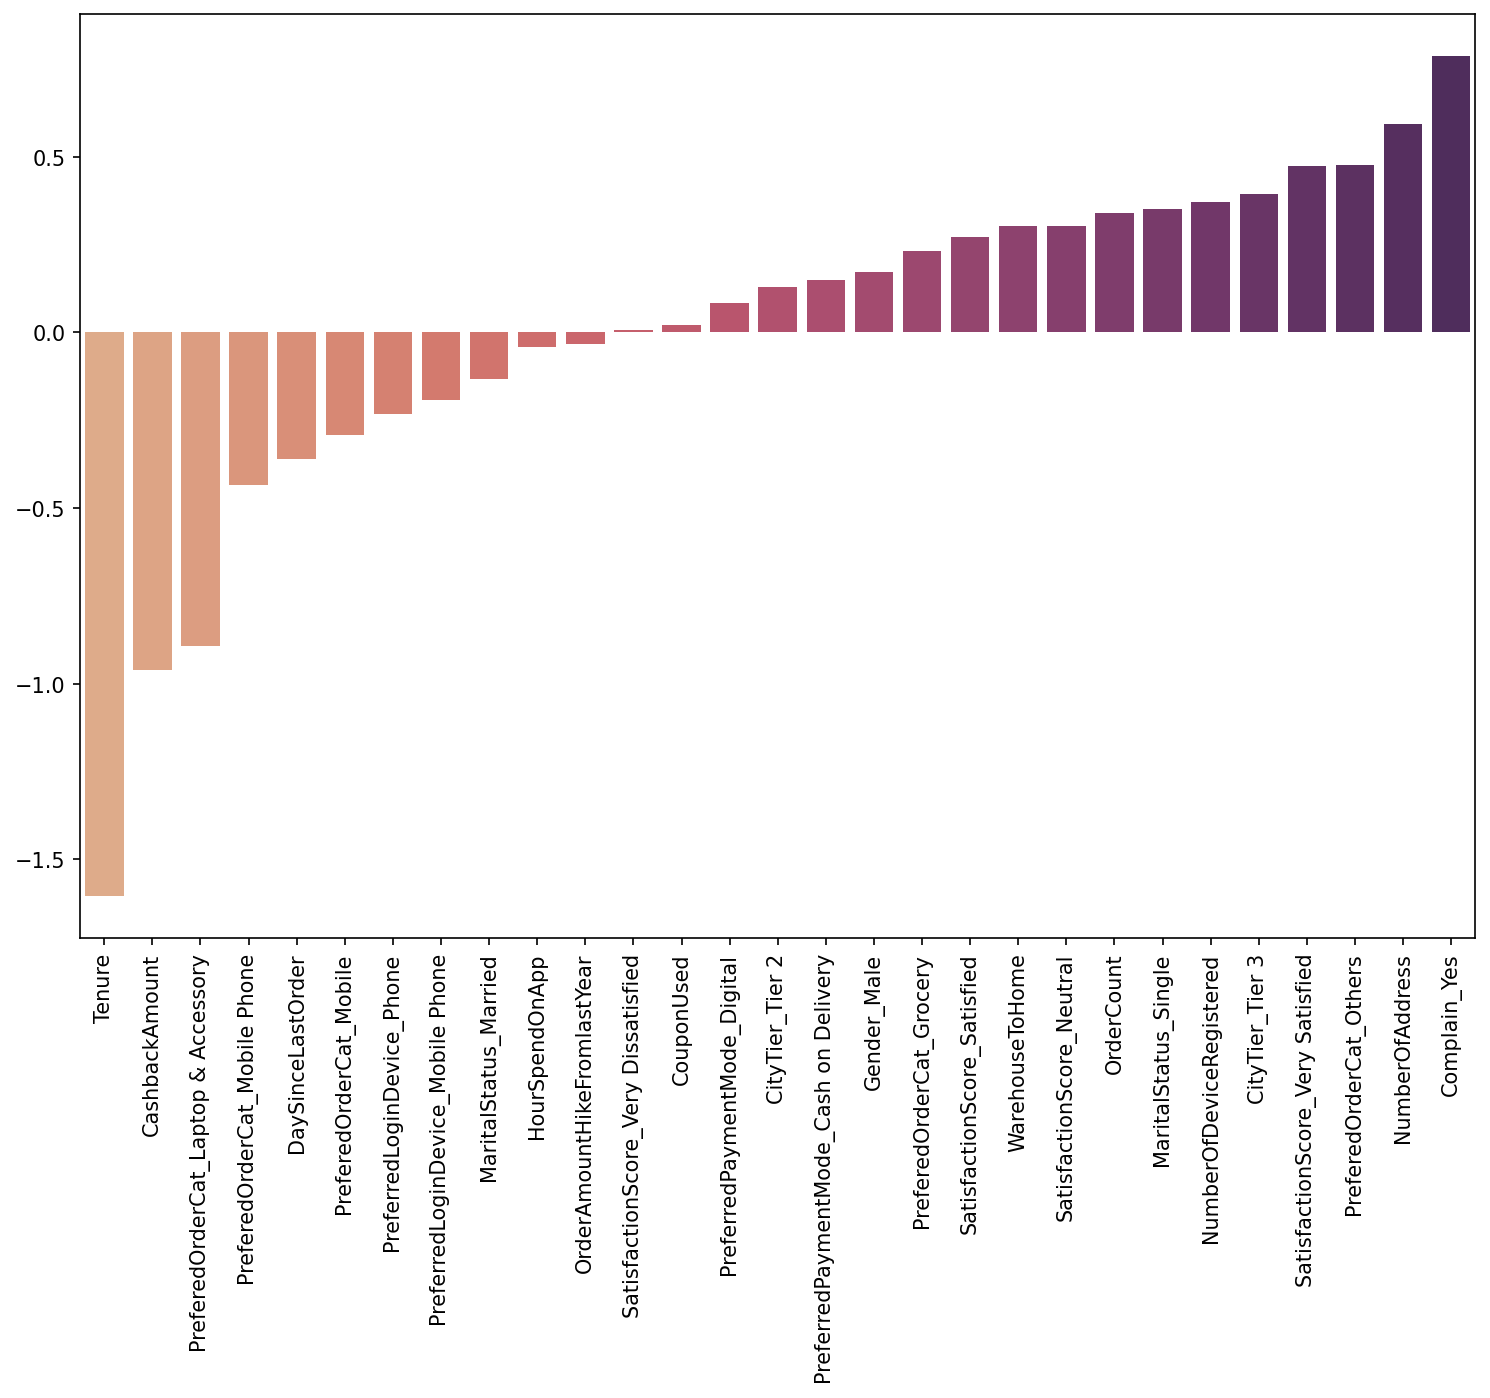

In [69]:
coefs = pd.Series(index=X.columns,data = logistic_regression.coef_[0])
coefs= coefs.sort_values()
plt.figure(figsize=(12,8),dpi=150)

sns.barplot(x=coefs.index, y=coefs.values, palette='flare')
plt.xticks(rotation=90);

## Random Forest

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators=[64,100,128,200, 300]
max_features= [2,3,4,6]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth': [None, 2, 4, 5, 7, 9, 10],
             'bootstrap':bootstrap,
             'oob_score':oob_score,
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 3, 4]} 

random_forest = RandomForestClassifier()
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled,y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'oob_score': False}
Best Score: 0.9602604513503514


In [72]:
# Create a new instance of Random Forest with the best parameters
random_forest = RandomForestClassifier(bootstrap=False, max_depth=None, max_features=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=False)

# Train the model on the scaled training data
random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99       941
         Yes       1.00      0.90      0.95       185

    accuracy                           0.98      1126
   macro avg       0.99      0.95      0.97      1126
weighted avg       0.98      0.98      0.98      1126



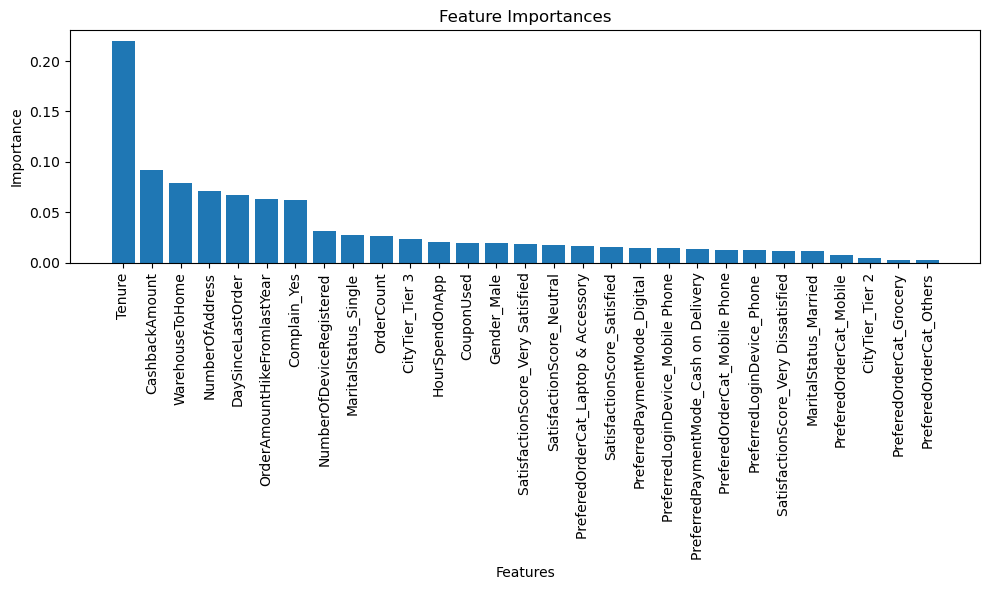

In [73]:
# Get the feature importances from the trained Random Forest model
importances = random_forest.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

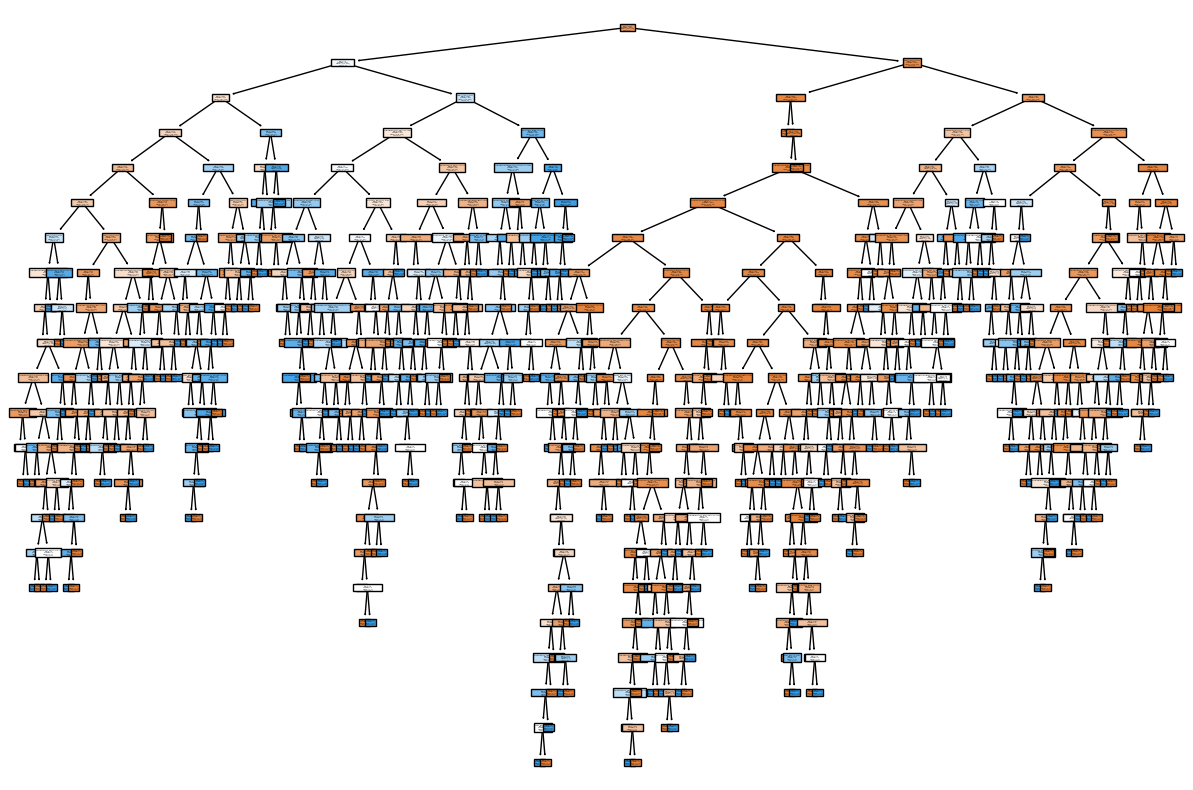

In [77]:
from sklearn import tree

# Select one decision tree from the Random Forest
tree_to_visualize = random_forest.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_to_visualize, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()

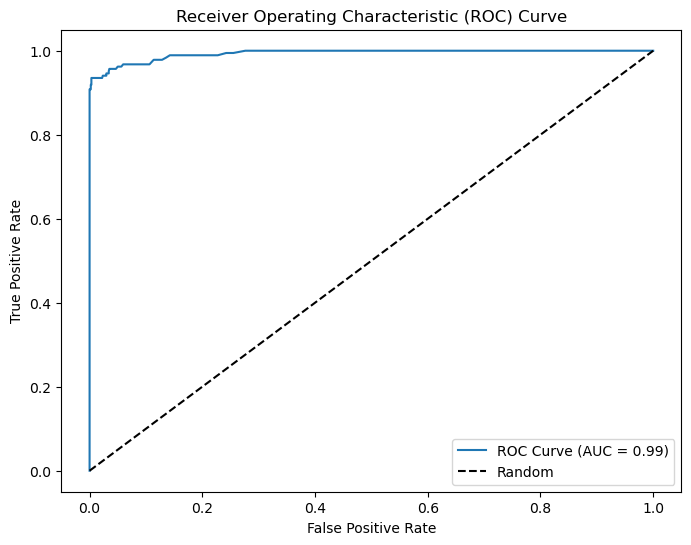

Average Precision (AP): 0.979464046929752


In [79]:
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
# Convert 'No' and 'Yes' labels in y_test to numeric values (0 and 1)
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})

# Get the predicted probabilities of the positive class (Yes)
y_pred_prob = random_forest.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_prob)

# Calculate the ROC AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test_numeric, y_pred_prob)

# Calculate the Average Precision (AP) score
ap = average_precision_score(y_test_numeric, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the Average Precision (AP) score
print("Average Precision (AP):", ap)

## Gradient Boosting 

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {"n_estimators":[1,5,10,20,40,100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.1, 0.2, 0.5, 1], 
              'max_depth':[2,3,4,5,6]}

gradient_boosting  = GradientBoostingClassifier()
grid_search = GridSearchCV(gradient_boosting ,param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300}
Best Score: 0.96359008509064


In [82]:
# Create a new Gradient Boosting classifier with the best parameters
gradient_boosting_best = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=6,
    n_estimators=300
)

# Fit the classifier on the training data
gradient_boosting_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gradient_boosting_best.predict(X_test_scaled)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99       941
         Yes       0.97      0.91      0.94       185

    accuracy                           0.98      1126
   macro avg       0.98      0.95      0.96      1126
weighted avg       0.98      0.98      0.98      1126



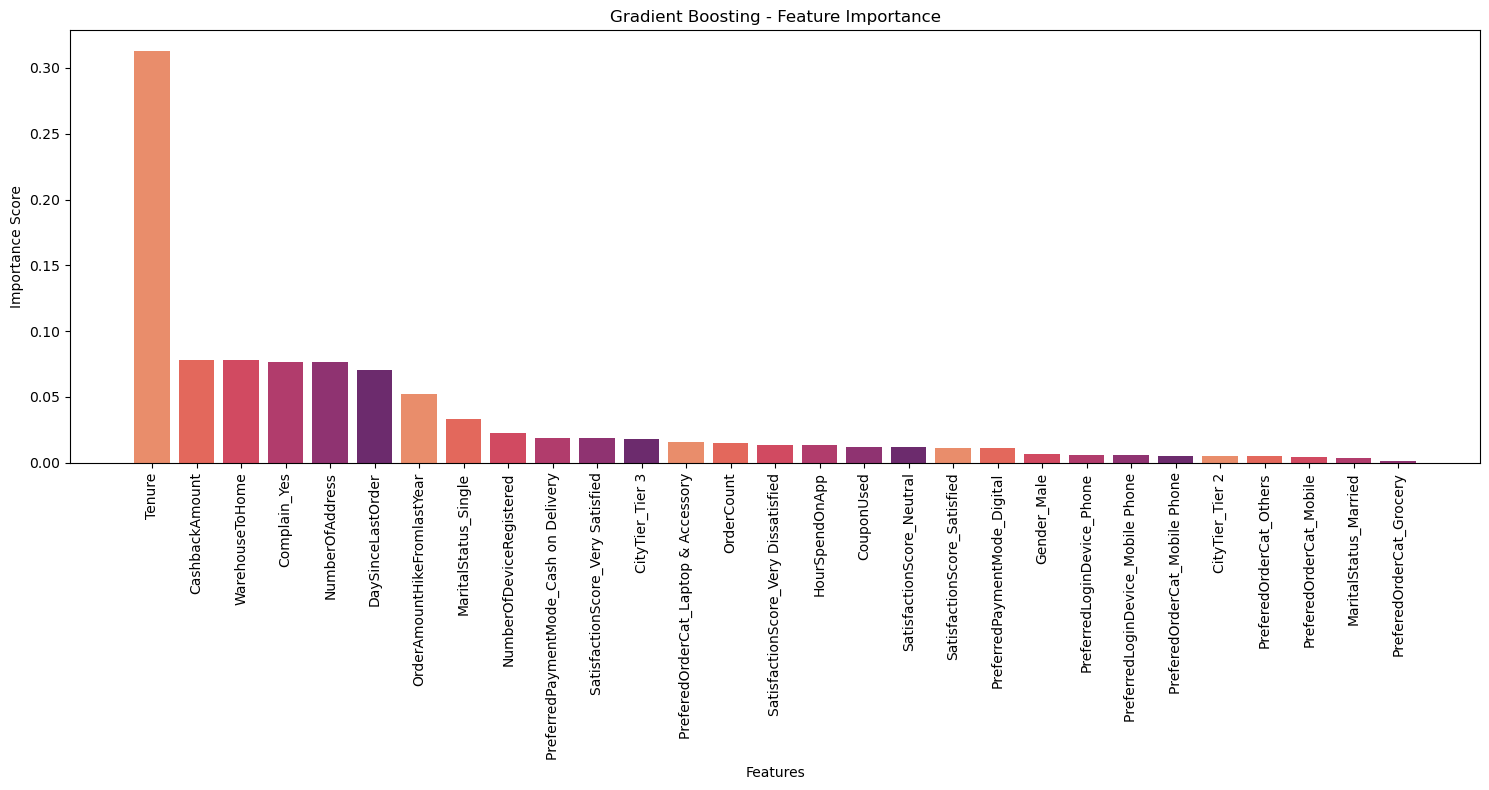

In [91]:
# Get the feature importances
importances = gradient_boosting_best.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.bar(range(len(importances)), sorted_importances,color=sns.color_palette('flare'))
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Gradient Boosting - Feature Importance")
plt.tight_layout()
plt.show()

## Support Vector Machine

In [92]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10, 40, 70, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 70, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9518226661733875


In [93]:
# Create a new SVC instance with the best parameters
svm = SVC(C=70, gamma='scale', kernel='rbf')

# Train the model on the training data
svm.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99       941
         Yes       0.95      0.92      0.93       185

    accuracy                           0.98      1126
   macro avg       0.97      0.95      0.96      1126
weighted avg       0.98      0.98      0.98      1126



# Evaluation